<font size='4'>**Problem statement:** Conduct Principal Component Analysis (PCA) on Wine dataset through two different methods.
1.  Without Scikit-learn's PCA Class
2.  With Scikit-learn's PCA class </font>

<br/><br/>

### 1. Without Scikit-learn's PCA class

In [1]:
# Importing libraries.
import wget
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_name  = "Wine.data"
zenodo_url = "https://zenodo.org/record/4159222/files/"

In [4]:
# Downloading the file Wine.data from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/Wine (1).data'

In [5]:
# Loading the downloaded file into dataframe.
df = pd.read_csv("./Assets/Wine.data")

In [6]:
# A bird's eye view on the dataframe.
df.head(3)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


#### Standardising the data.

In [14]:
X, Y = df.iloc[:, 1:].values, df.iloc[:, 0].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, 
                                                    stratify=Y,
                                                    random_state=0)

sc = StandardScaler()
Xtrain_std = sc.fit_transform(Xtrain)
Xtest_std = sc.transform(Xtest)

#### Constructing the covariance matrix.

In [15]:
cov_mat = np.cov(Xtrain_std.T)

#### Obtaining the eigenvalues and eigenvectors of the covariance matrix.

In [19]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n %s '%eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ] 


#### Sorting the eigenvalues by decreasing order to rank the eigenvectors.

In [20]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

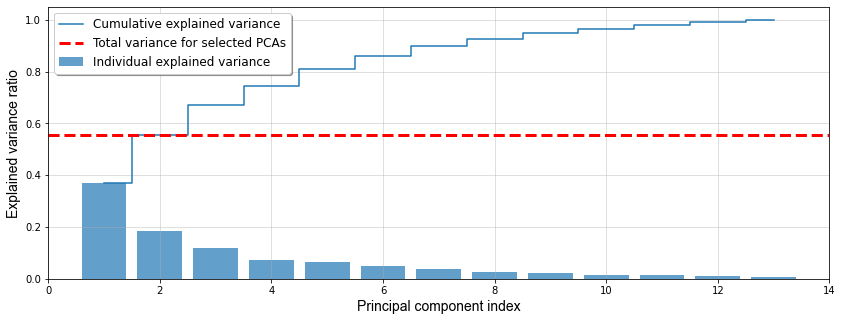

In [23]:
plt.figure(figsize=[14,5])
plt.bar(range(1,14), var_exp, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize=14, family='Arial')
plt.xlabel('Principal component index', fontsize=14, family='Arial')
plt.grid(which='major', alpha=0.5)
plt.xlim((0, df.shape[1]))

# Draw horizontal line correspondig on selected variation
plt.axhline(y=var_exp[0] + var_exp[1], color='red', linewidth=3,
            linestyle='--',
            label='Total variance for selected PCAs')

plt.legend(loc='best', shadow=True, fontsize=12)
plt.show()

In [31]:
plt.close()

In [24]:
print('PC1 ({}) and PC2 ({}) explains {}% of dataset.'.format(round(var_exp[0],2),
                                                              round(var_exp[1],2),
                                                              round((var_exp[0] + var_exp[1])*100,2)))

PC1 (0.37) and PC2 (0.18) explains 55.39% of dataset.


#### Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace k ≤ d. ( Feature extraction).

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#### Construct a projection matrix W from the 'top' eigenvectors.

In [26]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n{}'.format(w))

Matrix W:
[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


#### Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

#### x'= xW

In [28]:
Xtrain_std[0].dot(w)

array([2.38299011, 0.45458499])

#### X'= XW

In [30]:
Xtrain_pca = Xtrain_std.dot(w)

#### Visualising the transformed Wine training set.

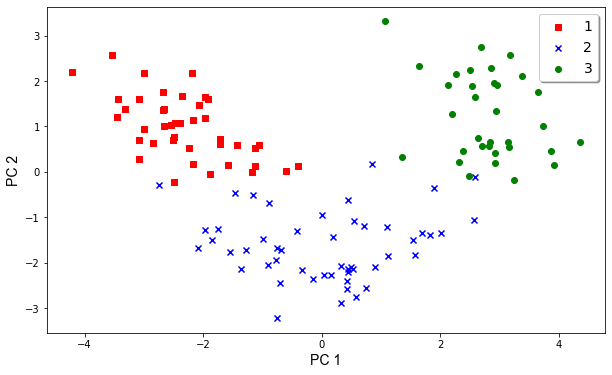

In [34]:
plt.figure(figsize=[10,6])
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(Ytrain), colors, markers):
    plt.scatter(Xtrain_pca[Ytrain==l, 0], 
                Xtrain_pca[Ytrain==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1', family='Arial', fontsize=14)
plt.ylabel('PC 2', family='Arial', fontsize=14)
plt.legend(loc='upper right', shadow=True, fontsize=14)
plt.show()

#### Note: As we can see in the resulting plot, the data is more spread along the PC 1 than the PC 2, which is consistent with the explained variance ratio plot that we created in the previous subsection. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.

### 2) With Scikit-learn's PCA class

In [49]:
def plot_decision_regions(X, Y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=[10,6])
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], 
                    y=X[Y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


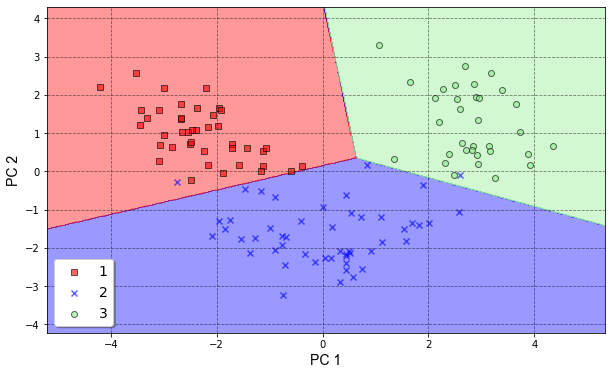

In [50]:
# Construct PCA plot with Matplotlib and Scikit-Learn
pca = PCA(n_components=2)
lr = LogisticRegression()

Xtrain_pca = pca.fit_transform(Xtrain_std)
Xtest_pca = pca.transform(Xtest_std)

# Fit the Training set to the Logistic Regression Classifier
lr.fit(Xtrain_pca, Ytrain)

#----------------------
# Call the Function Above
plot_decision_regions(Xtrain_pca, Ytrain, classifier=lr)
#----------------------
plt.xlabel('PC 1', fontsize=14, family='Arial')
plt.ylabel('PC 2', fontsize=14, family='Arial')

plt.legend(loc='lower left', fontsize=14, shadow=True)

plt.grid(which='major', color='black', alpha=0.5, linestyle='--')

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


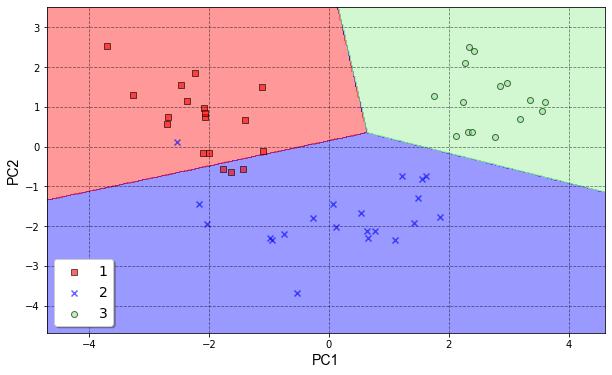

In [51]:
plot_decision_regions(Xtest_pca, Ytest, classifier=lr)
plt.xlabel('PC1', fontsize=14, family='Arial')
plt.ylabel('PC2', fontsize=14, family='Arial')
plt.legend(loc='lower left', shadow=True, fontsize=14)
plt.grid(which='major', color='black', alpha=0.5, linestyle='--')
plt.show()

<br/><br/>

<font size='4'><b>Final thoughts:</b> Although there are numerous feature extraction and feature selection techniques at our disposal, PCA is generally the go-to technique for dimensionality reduction. One can use different flavours of PCA (Incremental PCA, Randomized PCA and Kernel PCA) as per the requirement. Also, it is sensible to keep a copy of the original dataset before performing PCA task.</font>